# Análisis prectivo del precio del BitCoin

Se realiza la importanción de la librerias  e inicilizan los parámetros del código

In [1]:
import pandas as pd
from ecase.GetCoinData import *
from ecase.SentimentAnalysis import  SentiementAnalysis
from ecase.GenerativeModel import GenerativeModelOpenAi
import datetime
import torch
import numpy as np
from scipy.special import softmax
from tqdm import tqdm
import matplotlib.pyplot as plt
from datetime import date
from scipy import stats
from huggingface_hub import login
import openai


tqdm.pandas()
pd.set_option('display.max_rows', None)



In [2]:
#Parametros

#Modelo de lenguaje experto en analisi de sentimientos en tweets
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"


### 1. Descargar la información de CoinData y procesarla

Se implementó un caso de uso para la extracción de datos históricos del precio de Bitcoin durante el último año. Los datos obtenidos fueron procesados y estructurados en un DataFrame para su posterior análisis.

In [3]:
bitcoin = get_coin_data(days = 365)
df_prices = transform_data(bitcoin)
df_prices

,date,pricing
0,2024-03-18 00:00:00,68425.415656
1,2024-03-19 00:00:00,67708.943609
2,2024-03-20 00:00:00,62132.517379
3,2024-03-21 00:00:00,67819.055707
4,2024-03-22 00:00:00,65535.978448
5,2024-03-23 00:00:00,63509.044965
6,2024-03-24 00:00:00,64285.802791
7,2024-03-25 00:00:00,67310.983268
8,2024-03-26 00:00:00,69938.945302
9,2024-03-27 00:00:00,70082.051225


### 2. Cargar información de noticias y procesarlas

Se realizó la carga de noticias desde un archivo de texto y se procedió al análisis de sentimiento de los resúmenes de cada noticia, utilizando el modelo de análisis de sentimiento de código abierto especializado en datos de Twitter: [cardiffnlp/twitter-roberta-base-sentiment-latest](https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest).

**Nota**: Se recomienda correr en GPU para obtener el analisis de sentimientos

In [4]:
df = pd.read_csv('data/btc-news-recent-f.csv')
#Filrar solo las variables de interes
df = df[['published_date', 'title', 'summary']]

Se carga un Transformer especializado en  analisis de sentimientos en twitter para cada uno de registros

In [5]:
model_sentiment = SentiementAnalysis(MODEL)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT e

cuda:0


In [6]:

df['sentiment'] = df['summary'].progress_apply(lambda x: model_sentiment.sentiment_analysis(text = x))

100%|██████████| 6101/6101 [03:13<00:00, 31.52it/s]


## 3. Juntar información del texto con los valores historicos del precio



El análisis se realizará a nivel diario, agregando los datos sin considerar la información horaria. Por lo que se pasa las fechas extraidas de Coin de timestamp a date

In [7]:
df_prices['date'] = pd.to_datetime(df_prices['date'])
df_prices['date'] = df_prices['date'].dt.date
#Se quita el precio del día de hoy
df_prices = df_prices.iloc[:-1]

print('Tamño de los datos de precios: ', df_prices.shape)
df_prices_date = df_prices.groupby('date').size()
print(df_prices_date)



Tamño de los datos de precios:  (365, 2)
date
2024-03-18    1
2024-03-19    1
2024-03-20    1
2024-03-21    1
2024-03-22    1
2024-03-23    1
2024-03-24    1
2024-03-25    1
2024-03-26    1
2024-03-27    1
2024-03-28    1
2024-03-29    1
2024-03-30    1
2024-03-31    1
2024-04-01    1
2024-04-02    1
2024-04-03    1
2024-04-04    1
2024-04-05    1
2024-04-06    1
2024-04-07    1
2024-04-08    1
2024-04-09    1
2024-04-10    1
2024-04-11    1
2024-04-12    1
2024-04-13    1
2024-04-14    1
2024-04-15    1
2024-04-16    1
2024-04-17    1
2024-04-18    1
2024-04-19    1
2024-04-20    1
2024-04-21    1
2024-04-22    1
2024-04-23    1
2024-04-24    1
2024-04-25    1
2024-04-26    1
2024-04-27    1
2024-04-28    1
2024-04-29    1
2024-04-30    1
2024-05-01    1
2024-05-02    1
2024-05-03    1
2024-05-04    1
2024-05-05    1
2024-05-06    1
2024-05-07    1
2024-05-08    1
2024-05-09    1
2024-05-10    1
2024-05-11    1
2024-05-12    1
2024-05-13    1
2024-05-14    1
2024-05-15    1
2024-05-16

Para los datos de noticias se realiza el mismo proceso

In [8]:
df['published_date'] = pd.to_datetime(df['published_date'])
df['date'] = df['published_date'].dt.date
print('Tamaño de los datos de noticias', df.shape)
df.groupby('date').size()

Tamaño de los datos de noticias (6101, 5)


,0
date,
2024-06-02,1
2024-06-03,1
2024-06-04,4
2024-06-05,1
2024-06-06,5
2024-06-07,2
2024-06-09,2
2024-06-10,1
2024-06-11,4


Se realiza el merge entre los dos dataframes

In [9]:
df_merged = pd.merge(df_prices, df, on='date', how='left')
print(f'Hay {len(df_merged["date"].unique())} días disponibles para analisis')
#Se filtra la información final con la data disponible en el conjunto de datos de noticias
df_merged = df_merged[(df_merged['date'] <= date(2024, 12, 16)) & (df_merged['date'] >= date(2024, 6, 2))]


Hay 365 días disponibles para analisis


### 4. Analisis de información conjuta

Primero, se realiza un análisis estadístico diario, examinando la correlación entre el precio de Bitcoin y la moda del sentimiento registrado cada día. Dado que se quiere ver la correlación entre una variable numérica y una categoria se realiza un analisis de distribución con BoxPlot

In [10]:
df_merged.head()

,date,pricing,published_date,title,summary,sentiment
76,2024-06-02,67704.326418,2024-06-02 11:41:03,Trading expert sets one condition for Bitcoin ...,"Paul L. Cryptocurrency Jun 2, 2024 Bitcoin (BT...",neutral
77,2024-06-03,67740.016902,2024-06-03 00:08:02,Bitcoin post-halving run may reach $130K by Se...,Bitcoin (BTC) could reach a cycle peak of $130...,neutral
78,2024-06-04,68808.293686,2024-06-04 15:54:33,Positive Bitcoin price action drives renewed i...,Quick Take Grayscale's Bitcoin Trust (GBTC) is...,positive
79,2024-06-04,68808.293686,2024-06-04 12:00:04,Thailand Approves the First Spot Bitcoin ETF,Thailand has approved launching its first spot...,neutral
80,2024-06-04,68808.293686,2024-06-04 12:54:11,Bitcoin equities shift: MicroStrategy and mine...,Quick Take Bitcoin equities such as MicroStrat...,positive


In [11]:
def mode_calculator(serie):
    moda = stats.mode(serie)
    return moda.mode[0]



df_analysis = df_merged.groupby('date').agg({
    'pricing': 'mean',
    'sentiment': lambda x: x.mode().iloc[0] if not x.mode().empty else "None"
})
df_analysis.head()

,pricing,sentiment
date,,
2024-06-02,67704.326418,neutral
2024-06-03,67740.016902,neutral
2024-06-04,68808.293686,positive
2024-06-05,70600.011167,neutral
2024-06-06,71184.599431,neutral


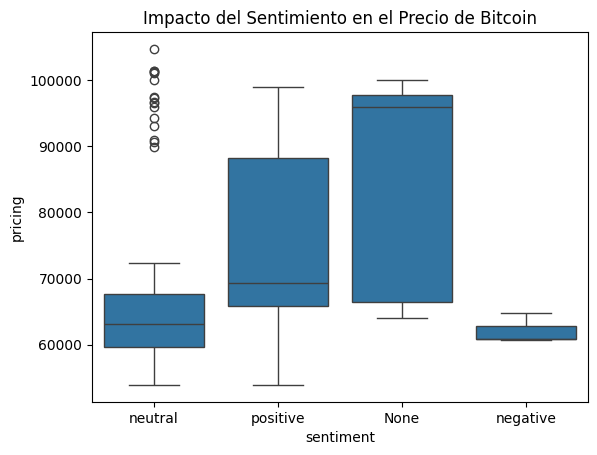

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Analizar impacto del sentimiento en el precio
sns.boxplot(x="sentiment", y="pricing", data=df_analysis)
plt.title("Impacto del Sentimiento en el Precio de Bitcoin")
plt.show()

Con lo anterior se peude ver que el modelo de sentimientos capta de manera adecuada el sentimiento del mercado, es decir la distribución de los precios esta relacionada con los sentimentos de las noticias **encontradas con el modelo**. El valor None es cuando no hay noticias en el día.

Dado esto se relizará un modelo predictivo de redes neuronales para predicir el valor del precio usando el historico de noticias y el historico de precios. Adicionalmente que se usará modelos de lenguaje para dada las noticias y la predicción se pueda concluir si es posible invertir o no

5. Modelado con LSTM

Convertir las variables categoricas a varaibles dummies y este será el conjunto de datos que se pasará a un modelo de redes neuronales recurrentes

In [13]:
df_dummies = pd.get_dummies(df_analysis['sentiment'], prefix='sentiment').astype(int)
df_to_model = pd.concat([df_analysis, df_dummies], axis=1)
df_to_model.drop('sentiment', axis=1, inplace=True)
df_to_model.head()

,pricing,sentiment_None,sentiment_negative,sentiment_neutral,sentiment_positive
date,,,,,
2024-06-02,67704.326418,0,0,1,0
2024-06-03,67740.016902,0,0,1,0
2024-06-04,68808.293686,0,0,0,1
2024-06-05,70600.011167,0,0,1,0
2024-06-06,71184.599431,0,0,1,0


In [14]:
class DataLoader:
    def __init__(self, X, block_size) -> None:
       self.curr_pos = 0
       self.X = torch.tensor(X)
       self.examples_index = list(range(0, len(X)-block_size, block_size))
       self.order = np.random.permutation(self.examples_index)
       self.block_size = block_size
       self.stride = 0

    def get_batch(self, batch_size):
        batch_examples = self.order[self.curr_pos:self.curr_pos+batch_size]
        self.curr_pos += len(batch_examples)

        if len(batch_examples) < batch_size:
            self.curr_pos = 0
            self.stride = (self.stride + 1) % self.block_size
            self.examples_index = list(range(self.stride, len(self.X)-self.block_size, self.block_size))
            self.order = np.random.permutation(self.examples_index)
            if  len(batch_examples) == 0:
                batch_examples = self.order[self.curr_pos:self.curr_pos+batch_size]
                self.curr_pos += len(batch_examples)

        x_bat = torch.stack([self.X[idx:idx+self.block_size] for idx in batch_examples], dim=0)
        y_bat = torch.stack([self.X[idx+1:idx+1+self.block_size] for idx in batch_examples], dim=0)
        return x_bat, y_bat


In [15]:
X = df_to_model.values
k = int(len(X)*0.9)
X_train = X[:k]
X_val = X[k:]

In [16]:
#Parametros del modelo
block_size = 10
batch_size = 128
hidden_layer = 512
number_num_inputs = X_train.shape[1]
dataloader_train = DataLoader(X = X_train, block_size = block_size)
dataloader_val = DataLoader(X = X_val, block_size = block_size)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
learning_rate = 0.1
epochs = 1500
num_layers = 10
print(device)

cuda


In [17]:
x_train, y_train = dataloader_train.get_batch(batch_size=batch_size)
print(x_train.shape)
print(y_train.shape)

torch.Size([17, 10, 5])
torch.Size([17, 10, 5])


In [18]:
class PredectiveNN(torch.nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.lstm = torch.nn.LSTM(number_num_inputs, hidden_layer, batch_first=True, dropout=0.5, num_layers=num_layers)
        self.layer_norm = torch.nn.LayerNorm(hidden_layer)

        self.dense_predict = torch.nn.Sequential(torch.nn.Linear(hidden_layer, hidden_layer*3, bias = True),
                                torch.nn.ReLU(), torch.nn.Dropout(0.4), torch.nn.Linear(hidden_layer*3, hidden_layer*2, bias = True),
                                torch.nn.ReLU(),
                                torch.nn.Linear(hidden_layer*2, 1, bias = True))

    def forward(self, x):
        output,  _ = self.lstm(x)
        output = self.layer_norm(output)
        output = self.dense_predict(output)
        return output[0]


def loss_function(y_pred, y):
    loss_mse =  torch.nn.functional.mse_loss(y_pred, y[0])
    return loss_mse

@torch.no_grad
def estimate_loss(model: torch.nn.Module, train_eval: DataLoader, val_eval: DataLoader, batch_size: int = 256, eval_iters: int = 10):
    model.eval()
    train_losses = []
    val_losses = []

    for i in range(eval_iters):
        x, y = train_eval.get_batch(batch_size)
        x, y = x.to(device).float(), y.to(device).float()
        y_pred = model(x)
        loss = loss_function(y_pred=y_pred, y = y)
        train_losses.append(loss.item())

        x, y = val_eval.get_batch(batch_size)
        x, y = x.to(device).float(), y.to(device).float()
        y_pred = model(x)
        loss = loss_function(y_pred=y_pred, y = y)
        val_losses.append(loss.item())
    train_loss = sum(train_losses)/eval_iters
    val_loss = sum(val_losses)/eval_iters

    model.train()
    return train_loss, val_loss

rnn = PredectiveNN()

print(f'El modelo tiene {sum([p.nelement() for p in rnn.parameters()]):,} parámetros.')


El modelo tiene 22,338,049 parámetros.


In [19]:
rnn.to(device)

train_losses = []
val_losses = []
rnn.train()
optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate, weight_decay=0.001)

print(f'Entrenando por {epochs} epocas')
for step in range(epochs):
    x, y = dataloader_val.get_batch(batch_size)
    x, y = x.to(device).float(), y.to(device).float()
    y_pred = rnn(x)
    loss =  loss_function(y_pred=y_pred, y = y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (step+1) % 100 == 0 or step == 0 or step == epochs-1:
        train_loss, valid_loss = estimate_loss(rnn, dataloader_train, dataloader_val)
        print(f'Step {step+1:4d} - Train loss: {train_loss:4.2f} - Valid loss: {valid_loss:4.2f}')
        train_losses.append(train_loss)
        val_losses.append(valid_loss)



Entrenando por 1500 epocas


<ipython-input-18-250e669d564e>:20: UserWarning: Using a target size (torch.Size([10, 5])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss_mse =  torch.nn.functional.mse_loss(y_pred, y[0])


Step    1 - Train loss: 4474229708.80 - Valid loss: 4561363507.20
Step  100 - Train loss: 747821708.80 - Valid loss: 1557845440.00
Step  200 - Train loss: 711481856.00 - Valid loss: 1554036377.60
Step  300 - Train loss: 838261043.20 - Valid loss: 1555429798.40
Step  400 - Train loss: 725778611.20 - Valid loss: 1553794585.60
Step  500 - Train loss: 689228166.40 - Valid loss: 1554765516.80
Step  600 - Train loss: 675341792.00 - Valid loss: 1553773977.60
Step  700 - Train loss: 786722867.20 - Valid loss: 1555649139.20
Step  800 - Train loss: 801810284.80 - Valid loss: 1558386880.00
Step  900 - Train loss: 810881241.60 - Valid loss: 1553654809.60
Step 1000 - Train loss: 761986995.20 - Valid loss: 1553621990.40
Step 1100 - Train loss: 721912979.20 - Valid loss: 1553943808.00
Step 1200 - Train loss: 662506387.20 - Valid loss: 1554436902.40
Step 1300 - Train loss: 652839193.60 - Valid loss: 1553718681.60
Step 1400 - Train loss: 695034758.40 - Valid loss: 1553716300.80
Step 1500 - Train loss: 

Nota: Se deja como desarrollo futuro la mejora de este modelo

### 6. Pronostico con modelos de lenguaje


Se usa GPT para poder generar insides y sacar la probabilidad de que suba o baje el valor del BitCoin

In [21]:
api_key = ''

In [22]:
model = GenerativeModelOpenAi(api_key=api_key )

#Se envia la fecha a al que se queire realizar el analisis
model.create_prediction(date = date(2024, 12, 16), df_merged = df_merged )


'Analysis:\nThe news heralds the continued maturation of cryptocurrency markets, with the advent of different Bitcoin ETF forms. This is an essential development because it provides investors with more options to establish exposure to Bitcoin. Key topics include the introduction of Spot Bitcoin ETFs and differences between them and Bitcoin futures ETFs. The increased market liquidity and easier accessibility of Bitcoin through ETFs are positive trends bolstering Bitcoin\'s adoption.\n\nThe news can potentially impact the Bitcoin market in several ways:\n\n1. Diversification of Investors Base: Spot Bitcoin ETFs provide a \'safer\' entry point for traditional investors unfamiliar with crypto exchanges. This could attract a new type of investors group into the Bitcoin market.\n\n2. Price Volatility: Futures ETFs create the opportunity for high-frequency trading, which may increase the price volatility of Bitcoin in the short term. \n\n3. Regulation: The advent of spot Bitcoin ETFs signals